In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import random
from sklearn.metrics import mean_squared_error
from statistics import median

In [27]:
img = cv2.imread('image.bmp',0)

In [28]:
def convolve2D(image, kernel, padding=0, strides=1):
  kernel = np.flipud(np.fliplr(kernel))

  xKernShape = kernel.shape[0]
  yKernShape = kernel.shape[1]
  xImgShape = image.shape[0]
  yImgShape = image.shape[1]

  xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
  yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
  output = np.zeros((xOutput, yOutput))

  if padding != 0:
    imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
    imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
  else:
    imagePadded = image

  for y in range(imagePadded.shape[1]):
    if y > imagePadded.shape[1] - yKernShape:
      break
    if y % strides == 0:
      for x in range(imagePadded.shape[0]):
        if x > imagePadded.shape[0] - xKernShape:
          break
        try:
          if x % strides == 0:
            output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
        except:
          break
    
  output[output>255]=255
  output[output<0]=0
    
  return output

In [29]:
def laplacian_filter (image):
  filter_matrix = np.array([(0, -1, 0), (-1, 5, -1), (0, -1, 0)])

  laplacian_filtered_image = convolve2D(image, filter_matrix, 1)

  return laplacian_filtered_image.astype(int)

In [30]:
def median_filter(image):
  R, C = image.shape
  
  filter_size = 5

  median_filtered_image = np.zeros((R, C))

  for r in range (R):
    for c in range (C):
      median_filtered_image[r][c] = median(image[r:r + filter_size, c:c + filter_size].flatten())
  
  return median_filtered_image

In [31]:
def mean_filter(image):
  R, C = image.shape

  filter_size = 5

  average_filtered_image = np.zeros((R, C))

  for r in range (R):
    for c in range (C):
      average_filtered_image[r][c] = np.mean(image[r:r + filter_size, c:c + filter_size].flatten())
  
  return average_filtered_image

In [32]:
R, C = img.shape

In [33]:
case_result = np.zeros((4, R, C))
case_mse = np.zeros(4)

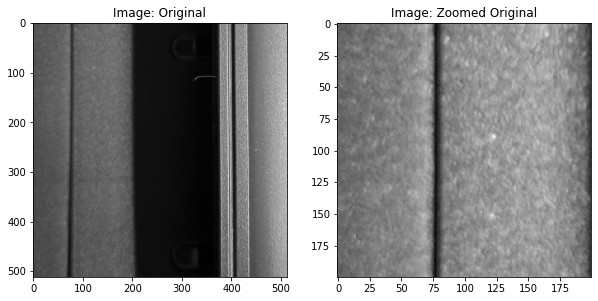

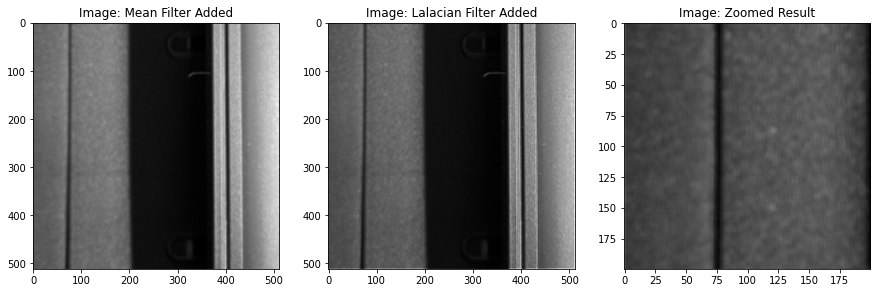

In [34]:
# Case 1: Mean Filter -> Laplacian Filter

case_number = 1

fig, plot = plt.subplots(1, 2, figsize = (10, 5))

plot[0].imshow(img, cmap='gray')
plot[0].set_title("Image: Original")

plot[1].imshow(img[0:200, 0:200], cmap='gray')
plot[1].set_title("Image: Zoomed Original")

mean_filtered_image = mean_filter(img)
laplacian_filtered_image = laplacian_filter(mean_filtered_image)

fig, plot = plt.subplots(1, 3, figsize = (15, 5))

plot[0].imshow(mean_filtered_image, cmap='gray')
plot[0].set_title("Image: Mean Filter Added")

plot[1].imshow(laplacian_filtered_image, cmap='gray')
plot[1].set_title("Image: Lalacian Filter Added")

plot[2].imshow(laplacian_filtered_image[0:200, 0:200], cmap='gray')
plot[2].set_title("Image: Zoomed Result")

case_result[case_number - 1, 0:R, 0:C] = laplacian_filtered_image
case_mse[case_number - 1] = mean_squared_error(case_result[case_number - 1, 0:R, 0:C], img)

/usr/lib/python3.8/statistics.py:435: RuntimeWarning: overflow encountered in ubyte_scalars
  return (data[i - 1] + data[i])/2


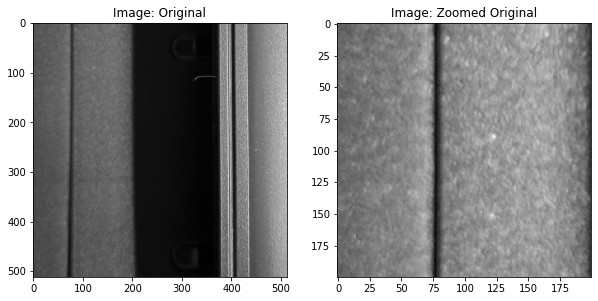

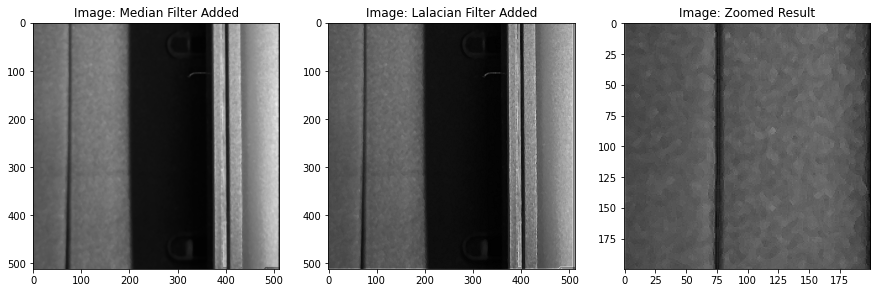

In [35]:
# Case 2: Median Filter -> Laplacian Filter

case_number = 2

fig, plot = plt.subplots(1, 2, figsize = (10, 5))

plot[0].imshow(img, cmap='gray')
plot[0].set_title("Image: Original")

plot[1].imshow(img[0:200, 0:200], cmap='gray')
plot[1].set_title("Image: Zoomed Original")

median_filtered_image = median_filter(img)
laplacian_filtered_image = laplacian_filter(median_filtered_image)

fig, plot = plt.subplots(1, 3, figsize = (15, 5))

plot[0].imshow(median_filtered_image, cmap='gray')
plot[0].set_title("Image: Median Filter Added")

plot[1].imshow(laplacian_filtered_image, cmap='gray')
plot[1].set_title("Image: Lalacian Filter Added")

plot[2].imshow(laplacian_filtered_image[0:200, 0:200], cmap='gray')
plot[2].set_title("Image: Zoomed Result")

case_result[case_number - 1, 0:R, 0:C] = laplacian_filtered_image
case_mse[case_number - 1] = mean_squared_error(case_result[case_number - 1, 0:R, 0:C], img)

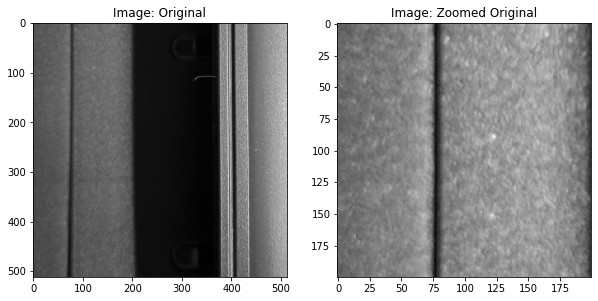

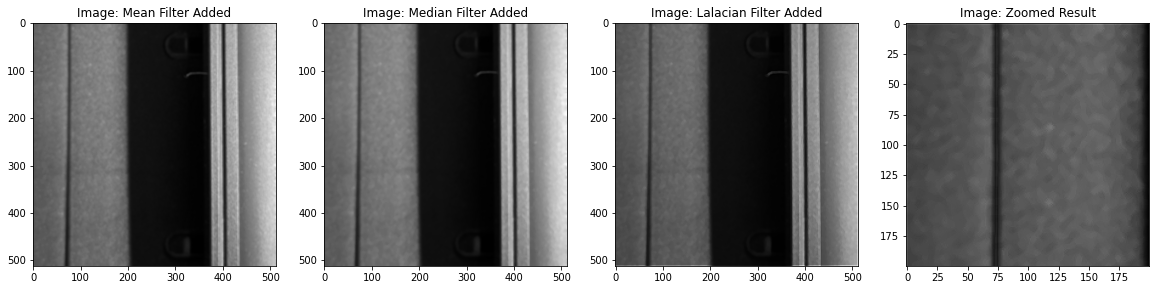

In [36]:
# Case 3: Mean Filter -> Median Filter -> Laplacian Filter

case_number = 3

fig, plot = plt.subplots(1, 2, figsize = (10, 5))

plot[0].imshow(img, cmap='gray')
plot[0].set_title("Image: Original")

plot[1].imshow(img[0:200, 0:200], cmap='gray')
plot[1].set_title("Image: Zoomed Original")

mean_filtered_image = mean_filter(img)
median_filtered_image = median_filter(mean_filtered_image)
laplacian_filtered_image = laplacian_filter(median_filtered_image)

fig, plot = plt.subplots(1, 4, figsize = (20, 5))

plot[0].imshow(mean_filtered_image, cmap='gray')
plot[0].set_title("Image: Mean Filter Added")

plot[1].imshow(median_filtered_image, cmap='gray')
plot[1].set_title("Image: Median Filter Added")

plot[2].imshow(laplacian_filtered_image, cmap='gray')
plot[2].set_title("Image: Lalacian Filter Added")

plot[3].imshow(laplacian_filtered_image[0:200, 0:200], cmap='gray')
plot[3].set_title("Image: Zoomed Result")

case_result[case_number - 1, 0:R, 0:C] = laplacian_filtered_image
case_mse[case_number - 1] = mean_squared_error(case_result[case_number - 1, 0:R, 0:C], img)

/usr/lib/python3.8/statistics.py:435: RuntimeWarning: overflow encountered in ubyte_scalars
  return (data[i - 1] + data[i])/2


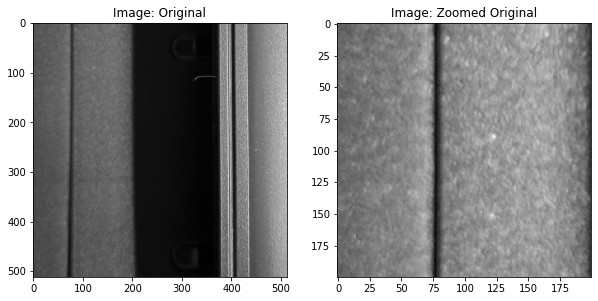

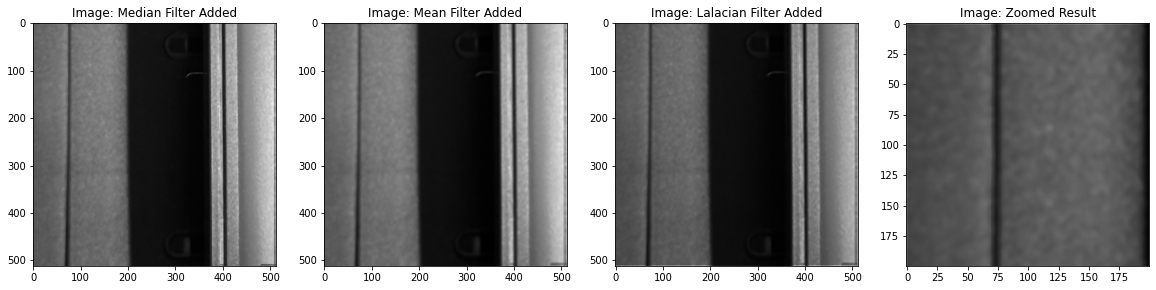

In [37]:
# Case 4: Median Filter -> Mean Filter -> Laplacian Filter

case_number = 4

fig, plot = plt.subplots(1, 2, figsize = (10, 5))

plot[0].imshow(img, cmap='gray')
plot[0].set_title("Image: Original")

plot[1].imshow(img[0:200, 0:200], cmap='gray')
plot[1].set_title("Image: Zoomed Original")

median_filtered_image = median_filter(img)
mean_filtered_image = mean_filter(median_filtered_image)
laplacian_filtered_image = laplacian_filter(mean_filtered_image)

fig, plot = plt.subplots(1, 4, figsize = (20, 5))

plot[0].imshow(median_filtered_image, cmap='gray')
plot[0].set_title("Image: Median Filter Added")

plot[1].imshow(mean_filtered_image, cmap='gray')
plot[1].set_title("Image: Mean Filter Added")

plot[2].imshow(laplacian_filtered_image, cmap='gray')
plot[2].set_title("Image: Lalacian Filter Added")

plot[3].imshow(laplacian_filtered_image[0:200, 0:200], cmap='gray')
plot[3].set_title("Image: Zoomed Result")

case_result[case_number - 1, 0:R, 0:C] = laplacian_filtered_image
case_mse[case_number - 1] = mean_squared_error(case_result[case_number - 1, 0:R, 0:C], img)

MSE Report
Case 1: Mean Filter -> Laplacian Filter MSE = 261.7553291320801
Case 2: Median Filter -> Laplacian Filter MSE = 543.8545913696289
Case 3: Mean Filter -> Median Filter -> Laplacian Filter MSE = 523.1673278808594
Case 4: Median Filter -> Mean Filter -> Laplacian Filter MSE = 573.9383583068848


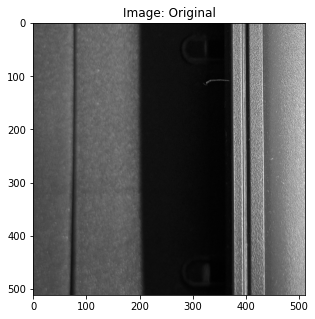

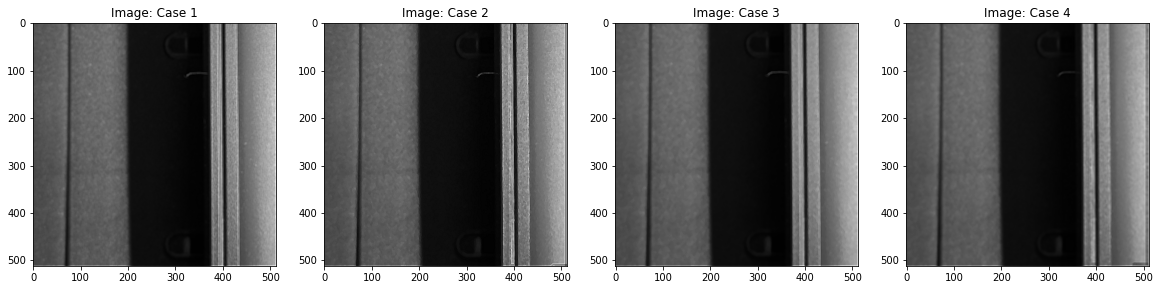

In [38]:
# All Cases Results + MSE Report

fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

fig, plot = plt.subplots(1, 4, figsize = (20, 5))

for case in range (len(case_result)):
  plot[case].imshow(case_result[case], cmap='gray')
  plot[case].set_title("Image: Case " + str(case + 1))

print("MSE Report")
print("Case 1: Mean Filter -> Laplacian Filter MSE = " + str(case_mse[0]))
print("Case 2: Median Filter -> Laplacian Filter MSE = " + str(case_mse[1]))
print("Case 3: Mean Filter -> Median Filter -> Laplacian Filter MSE = " + str(case_mse[2]))
print("Case 4: Median Filter -> Mean Filter -> Laplacian Filter MSE = " + str(case_mse[3]))